## Countplot
Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

In [2]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy
import warnings;
warnings.filterwarnings('ignore')

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

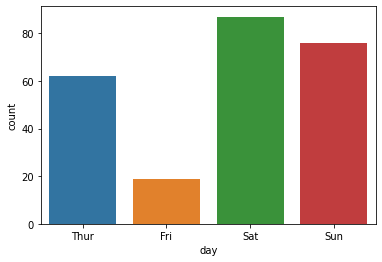

In [6]:
sns.countplot(x='day', data=tips);

# sns.countplot(tips["day"])

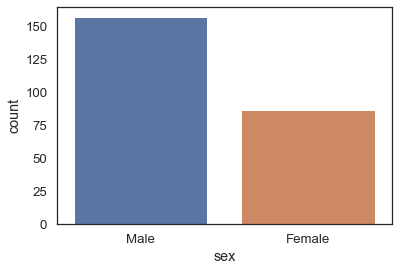

In [74]:
sns.countplot(x='sex', data=tips);

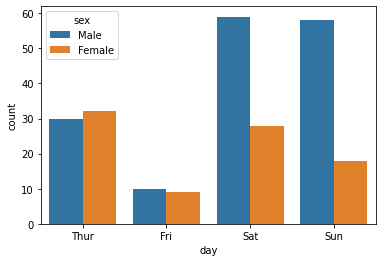

In [23]:
sns.countplot(x='day', data=tips, hue="sex");

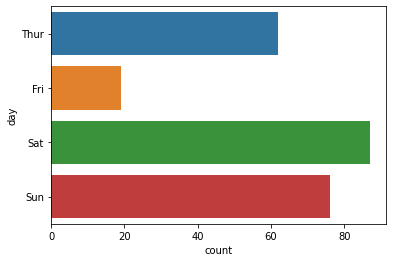

In [45]:
# horizontal countplot

sns.countplot(y='day', data=tips);

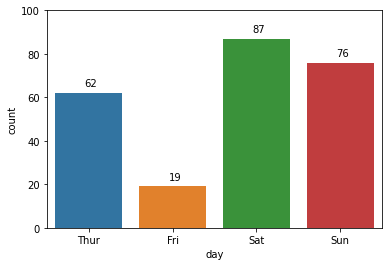

In [22]:
fig, ax = plt.subplots()

ax = sns.countplot(x='day', data=tips)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+3))
    
ax.set_ylim(0, 100);

In [39]:
ax.patches

In [40]:
for p in ax.patches:
  print(p)

Rectangle(xy=(-0.4, 0), width=0.4, height=30, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=10, angle=0)
Rectangle(xy=(1.6, 0), width=0.4, height=59, angle=0)
Rectangle(xy=(2.6, 0), width=0.4, height=58, angle=0)
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=32, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=9, angle=0)
Rectangle(xy=(2, 0), width=0.4, height=28, angle=0)
Rectangle(xy=(3, 0), width=0.4, height=18, angle=0)


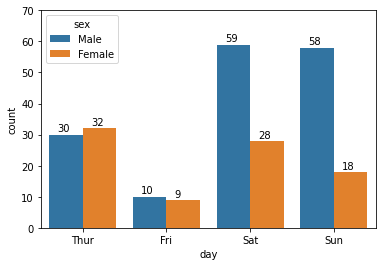

In [34]:
fig, ax = plt.subplots()

ax = sns.countplot(x='day', data=tips, hue="sex")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1))
    
ax.set_ylim(0, 70);

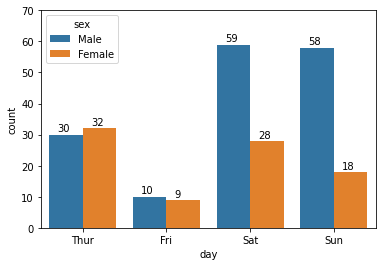

In [35]:
fig, ax = plt.subplots()

sns.countplot(x='day', data=tips, hue="sex" ,ax=ax)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1))
    
ax.set_ylim(0, 70);

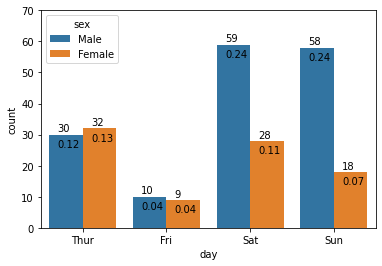

In [38]:
# extra imformation (add percentage)

fig, ax = plt.subplots()

ax = sns.countplot(x='day', data=tips, hue="sex")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1))
    ax.text(p.get_x()+0.1, p.get_height()-4,str(round(p.get_height()/tips.day.count(),2)))
    
ax.set_ylim(0, 70);

## Order

In [46]:
diamonds = sns.load_dataset('diamonds')

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [47]:
diamonds = diamonds[diamonds.clarity.isin(['SI1', 'VS2'])]

In [48]:
diamonds.shape

(25323, 10)

In [49]:
diamonds.color.cat.categories

Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

In [50]:
diamonds.cut.cat.categories

Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')

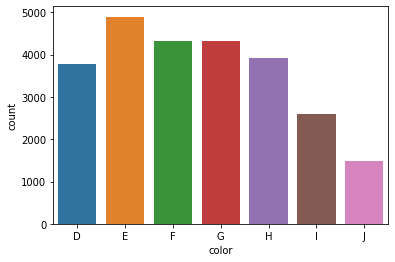

In [51]:
sns.countplot(x='color', data=diamonds);

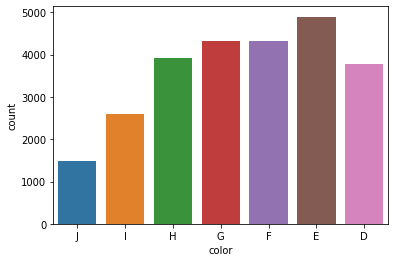

In [52]:
color_order=['J', 'I', 'H', 'G', 'F', 'E', 'D']

sns.countplot(x='color', data=diamonds, order=color_order);

In [53]:
diamonds.color.value_counts().index

CategoricalIndex(['E', 'F', 'G', 'H', 'D', 'I', 'J'], categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=False, dtype='category')

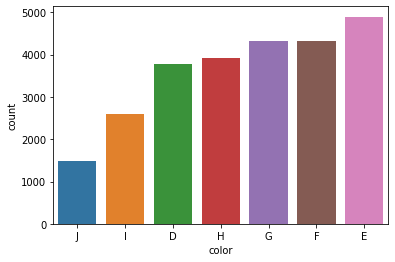

In [54]:
sns.countplot(x='color', data=diamonds,
              order=diamonds.color.value_counts().index[::-1]  #remove [::-1] for descending
             );

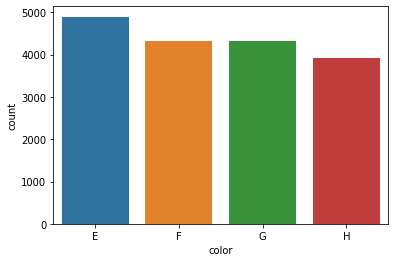

In [56]:
sns.countplot(x='color', data=diamonds,
              order=diamonds.color.value_counts()[:4].index
             );

## hue order

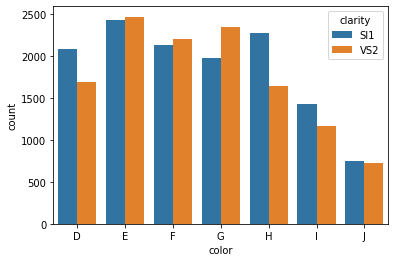

In [57]:
sns.countplot(x='color', data=diamonds, hue='clarity', hue_order=['SI1', 'VS2']);

## styling

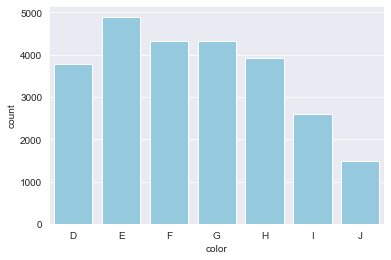

In [60]:
sns.set_style('darkgrid')
sns.countplot(x='color', data=diamonds, color='skyblue');

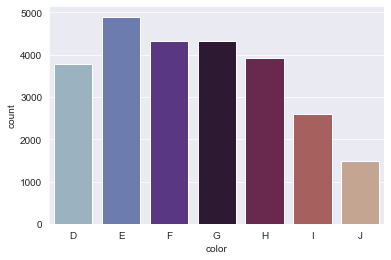

In [61]:
sns.countplot(x='color', data=diamonds, palette='twilight');

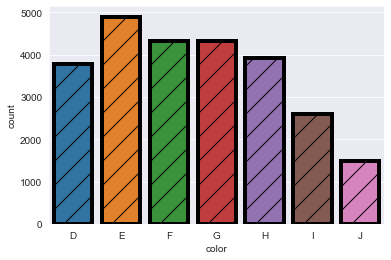

In [62]:
sns.countplot(x='color', data=diamonds, lw=4, ec='black', hatch='/');

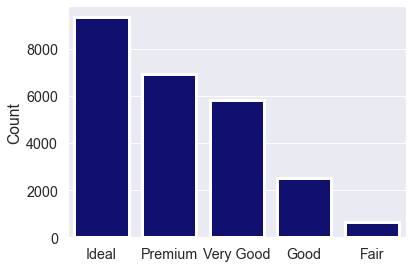

In [63]:
sns.set(style='darkgrid', font_scale=1.3)
sns.countplot(x='cut', data=diamonds, color='navy', lw=3)

plt.xlabel('')
plt.ylabel('Count')

plt.tight_layout()
#plt.savefig('20countplot_image_countplotExample.png', dpi=200);

## EXAMPLES

In [69]:
sns.set_style('white')

In [70]:
countries = {
    'country': ['Turkey', 'Cameroon', 'Albania', 'Brazil', 'Poland', 'Canada', 'Japan', 'Fiji'], 
    'capital': ['[Ankara]', '[Yaounde]', '[Tirana]', '[Brasilia]', '[Warsaw]', '[Ottawa]', '[Tokyo]', '[Suva]'], 
    'continent': ['Europe/Asia', 'Africa', 'Europe', 'South America', 'Europe', 'North America', 'Asia', 'Australia/Oceania'],
    'population': [84339067, 26545863, 2877797, 212559417, 37846611, 37742154, 126476461, 896444],
    'land area': [769630, 472710, 27400, 8358140, 306230, 9093510, 364555, 18270],
    'density': [109, 56, 105, 25, 124, 4, 346, 49],
    'ocean_coast': ['False', 'True', 'False', 'True', 'False', 'True', 'True', 'True']
}

In [71]:
df = pd.DataFrame(countries)
df

,country,capital,continent,population,land area,density,ocean_coast
0,Turkey,[Ankara],Europe/Asia,84339067,769630,109,False
1,Cameroon,[Yaounde],Africa,26545863,472710,56,True
2,Albania,[Tirana],Europe,2877797,27400,105,False
3,Brazil,[Brasilia],South America,212559417,8358140,25,True
4,Poland,[Warsaw],Europe,37846611,306230,124,False
5,Canada,[Ottawa],North America,37742154,9093510,4,True
6,Japan,[Tokyo],Asia,126476461,364555,346,True
7,Fiji,[Suva],Australia/Oceania,896444,18270,49,True


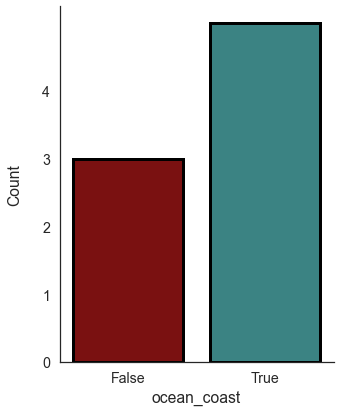

In [72]:
plt.figure(figsize=(5, 6))

sns.countplot(x='ocean_coast', data=df, ec='black', lw=3, palette=['darkred', '#2F8F8F'])

plt.yticks([0, 1, 2, 3, 4])
plt.ylabel('Count', labelpad=20)

sns.despine()

plt.tight_layout()
#plt.savefig('21countplot_figure_dogsCats.svg');

## Thumb

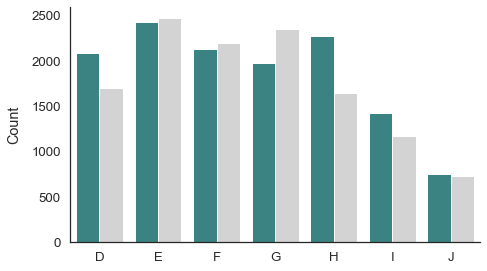

In [73]:
plt.figure(figsize=(7,4))
sns.set(style='white', font_scale=1.2)
ax = sns.countplot(x='color', data=diamonds, 
                   hue='clarity', hue_order=['SI1', 'VS2'], 
                   palette=['#2F8F8F', 'lightgray'])
ax.legend([], frameon=False)
sns.despine()

plt.xlabel('')
plt.ylabel('Count', labelpad=10)
plt.tight_layout()
#plt.savefig('21countplot_image_thumb.png', dpi=200);

## differences between barplot and countplot

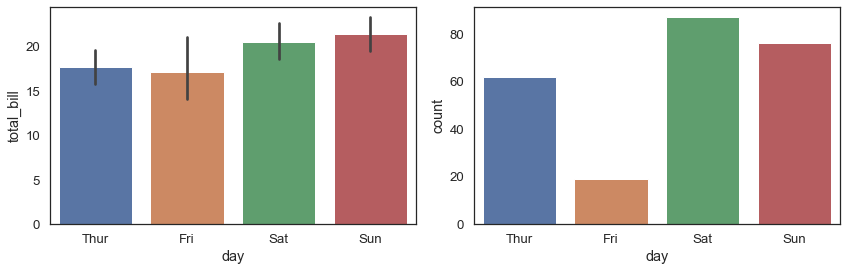

In [75]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.barplot(x="day", y="total_bill", data=tips, ax = ax[0])
sns.countplot(x="day", data=tips, ax = ax[1])

plt.tight_layout()

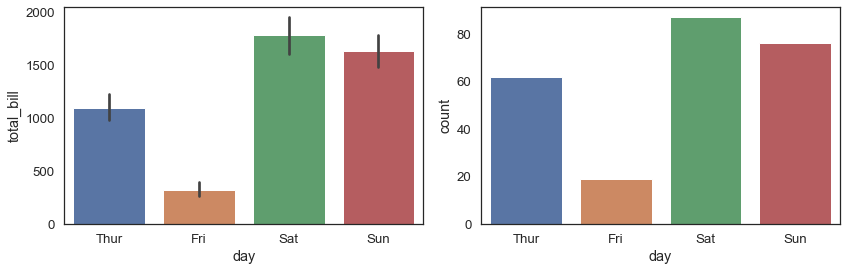

In [76]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.barplot(x="day", y="total_bill", data=tips, ax = ax[0], estimator=np.sum)   
# estimator param (np.mean, np.median, np.sum, np,maz, np.min, np.count_nonzero)
sns.countplot(x="day", data=tips, ax = ax[1])

plt.tight_layout()